In [26]:
import numpy as np
import sys

In [27]:
import cv2 as cv

In [28]:
from utility import util

In [29]:
sys.path.append('..')

In [12]:
sys.path

['C:\\Users\\Oksaa\\Downloads',
 'C:\\Users\\Oksaa\\anaconda3\\envs\\newdew\\python37.zip',
 'C:\\Users\\Oksaa\\anaconda3\\envs\\newdew\\DLLs',
 'C:\\Users\\Oksaa\\anaconda3\\envs\\newdew\\lib',
 'C:\\Users\\Oksaa\\anaconda3\\envs\\newdew',
 '',
 'C:\\Users\\Oksaa\\anaconda3\\envs\\newdew\\lib\\site-packages',
 'C:\\Users\\Oksaa\\anaconda3\\envs\\newdew\\lib\\site-packages\\win32',
 'C:\\Users\\Oksaa\\anaconda3\\envs\\newdew\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Oksaa\\anaconda3\\envs\\newdew\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Oksaa\\anaconda3\\envs\\newdew\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Oksaa\\.ipython',
 '..',
 '..']

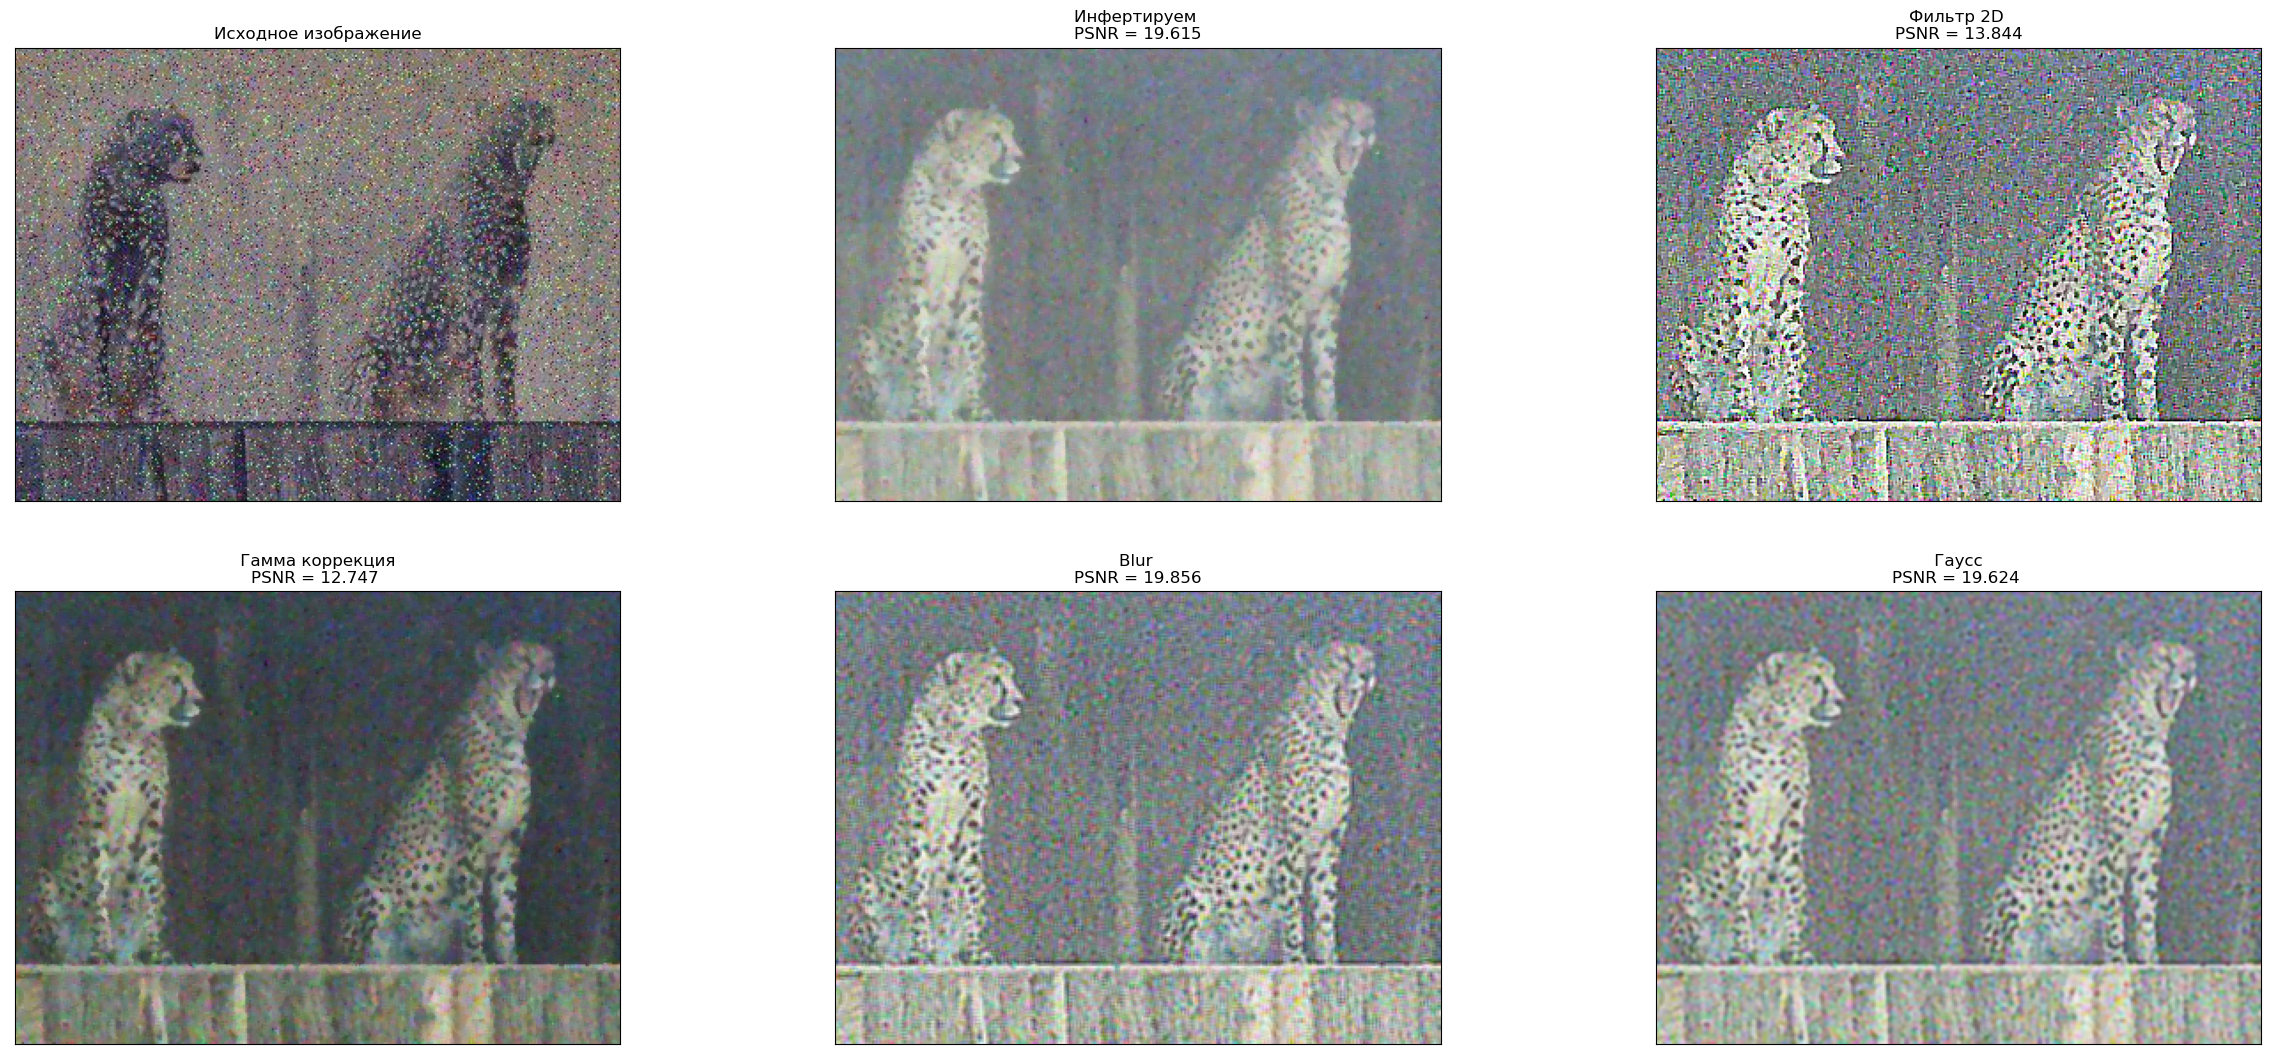

In [34]:
image = cv.imread('lab3.png')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
img11=cv.bitwise_not(image)

blur_image = cv.medianBlur(image, 3)
imagem = cv.bitwise_not(blur_image)

gamma_corrected = np.array(255*(imagem / 255) ** 1.85, dtype = 'uint8')
kernel = np.asarray([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
im = cv.filter2D(imagem, -1, kernel)
imgb = cv.blur(im, (3,3))
blur = cv.GaussianBlur(im,(5,5),1)

# вывод
plt.figure(figsize=(30, 20))

plt.subplot(331)
plt.xticks([]), plt.yticks([])
plt.title('Исходное изображение')
plt.imshow(image, cmap='gray')


plt.subplot(332)
plt.xticks([]), plt.yticks([])
plt.title(f'Инфертируем \n'
          f'PSNR = {util.getPSNR(img11, imagem):.3f}')
plt.imshow(imagem, 'gray')

plt.subplot(333)
plt.xticks([]), plt.yticks([])
plt.title(f'Фильтр 2D \n'
          f'PSNR = {util.getPSNR(img11, im):.3f}')
plt.imshow(im, 'gray')

plt.subplot(335)
plt.xticks([]), plt.yticks([])
plt.title(f'Blur \n'
          f'PSNR = {util.getPSNR(img11, imgb):.3f}')
plt.imshow(imgb, 'gray')

plt.subplot(336)
plt.xticks([]), plt.yticks([])
plt.title(f' Гаусс \n'
          f'PSNR = {util.getPSNR(img11, blur):.3f} ')
plt.imshow(blur, 'gray')

plt.subplot(334)
plt.xticks([]), plt.yticks([])
plt.title(f' Гамма коррекция \n'
          f'PSNR = {util.getPSNR(img11, gamma_corrected):.3f} ')
plt.imshow(gamma_corrected, 'gray')

plt.show()

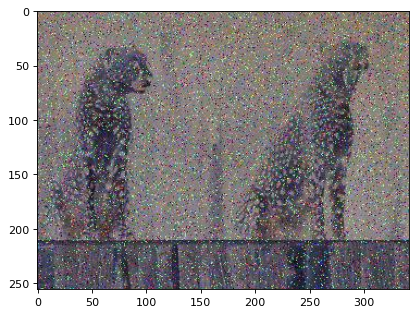

In [32]:
from matplotlib.pyplot import figure
figure(figsize=(6, 5), dpi=80)
plt.imshow(image)

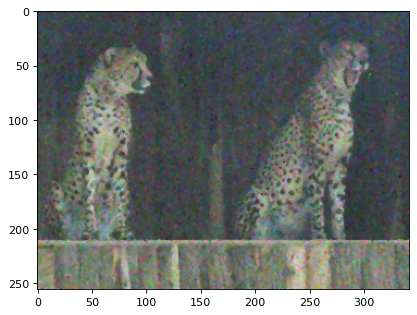

In [33]:
from matplotlib.pyplot import figure
figure(figsize=(6, 5), dpi=80)
plt.imshow(gamma_corrected)

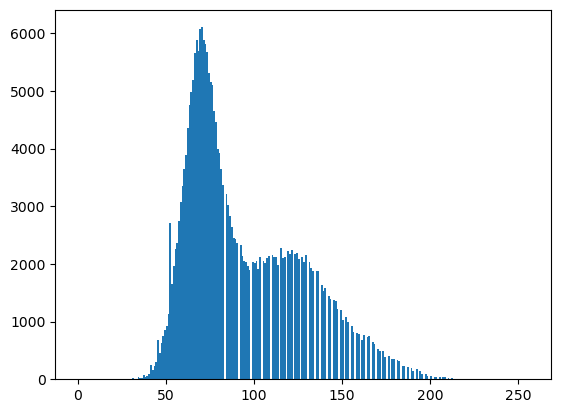

In [36]:
plt.hist(gamma_corrected.ravel(), 256, [0, 256])
plt.show()

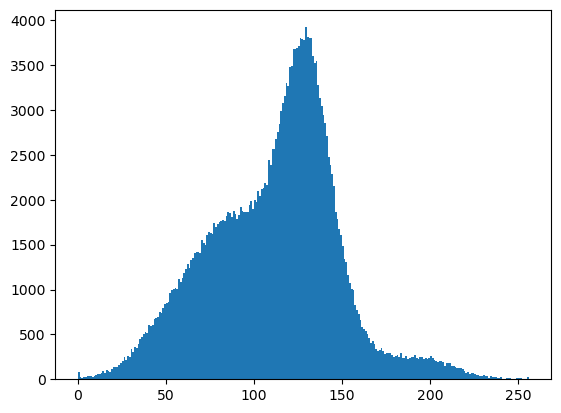

In [37]:
plt.hist(image.ravel(), 256, [0, 256])
plt.show()